# NEST Cerebellar Models



In [1]:
from src import simulation
from src import analysis
from src import visualization


              -- N E S T --
  Copyright (C) 2004 The NEST Initiative

 Version: 3.8.0
 Built: Aug 27 2024 04:38:39

 This program is provided AS IS and comes with
 NO WARRANTY. See the file LICENSE for details.

 Problems or suggestions?
   Visit https://www.nest-simulator.org

 Type 'nest.help()' to find out more about NEST.


Feb 17 19:07:30 SimulationManager::set_status [Info]: 
    Temporal resolution changed from 0.1 to 0.1 ms.


In [2]:
results = simulation.example_simulation()
# Waiting time: ~ 4:30 min

Created 10000 granule cells.
Created 256 Purkinje cells.
Created 450 interneurons.
Created 100 Golgi cells.
Created 50 deep cerebellar nuclei cells.
Created 2000 mossy fibers.
Created 256 climbing fibers.
Number of mossy -> granule connections: 1000935
Number of mossy -> golgi connections: 39731
Number of mossy -> DCN connections: 100000
Number of granule -> golgi connections: 9881
Number of granule -> purkinje connections: 2304746
Number of granule -> interneuron connections: 1349322
Number of golgi -> granule connections: 99902
Number of golgi -> golgi connections: 2045
Number of climbing -> purkinje connections: 256
Number of interneuron -> purkinje connections: 23157
Number of interneuron -> interneuron connections: 81247
Number of purkinje -> DCN connections: 1280
Network setup complete.

Feb 17 19:09:57 ConnectionManager [Warning]: 
    New connections created, connection descriptors previously obtained using 
    'GetConnections' are now invalid.
Simulation running...

Feb 17 19

Avg firing rate: 132.08 Hz
Avg ISI CV: 0.01
Avg spike correlation: nan
Avg firing rate: 214.24 Hz
Avg ISI CV: 0.01
Avg spike correlation: nan


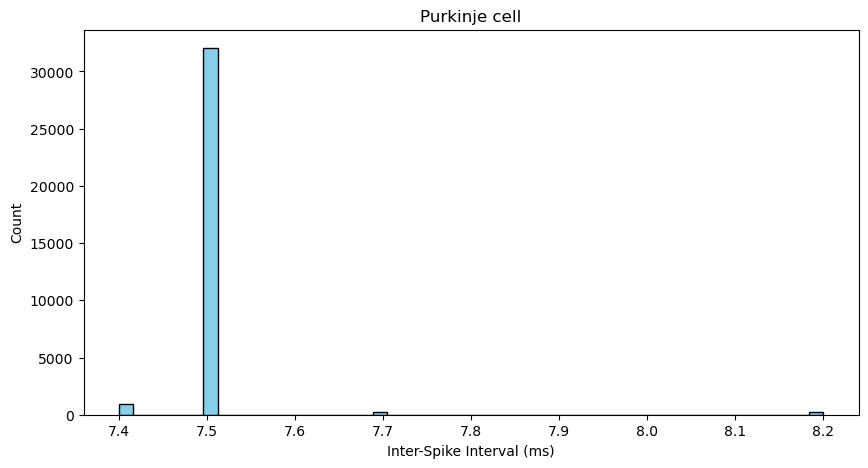

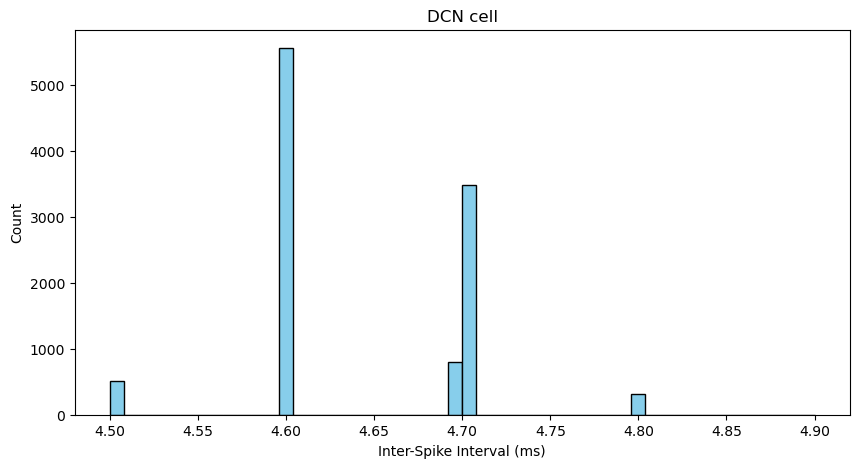

In [7]:
pc_spike_data = results["purkinje_spikes"]
dcn_spike_data = results["dcn_spikes"]

pc_spike_data = analysis.analyze_spike_data(pc_spike_data)
dcn_spike_data = analysis.analyze_spike_data(dcn_spike_data)

spike_trains_pc = pc_spike_data["spike_trains"]
spike_trains_dcn = dcn_spike_data["spike_trains"]

isis_distribution_pc = analysis.get_isi_distribution(spike_trains_pc)
isis_distribution_dcn = analysis.get_isi_distribution(spike_trains_dcn)

visualization.plot_isi_histogram(isis_distribution_pc, title="Purkinje cell")
visualization.plot_isi_histogram(isis_distribution_dcn, title="DCN cell")

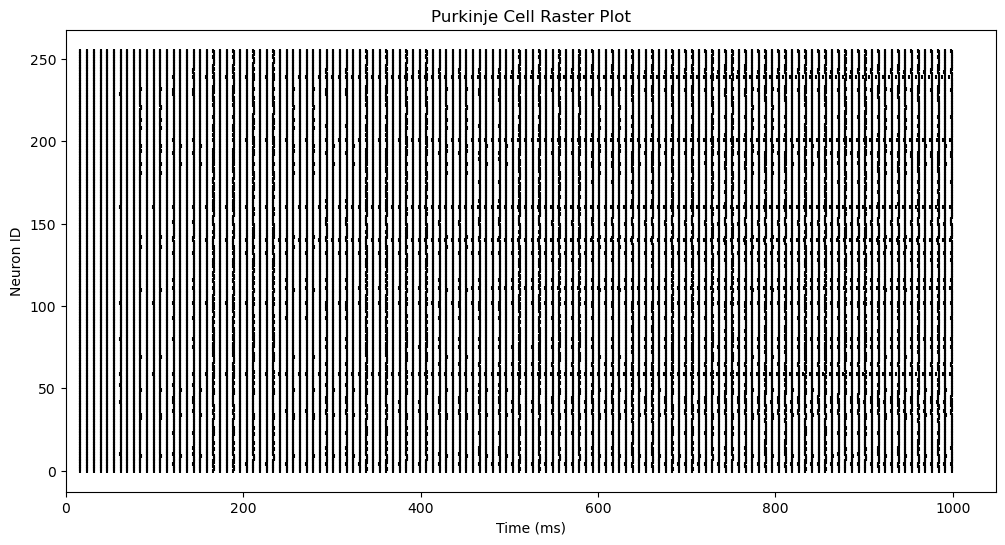

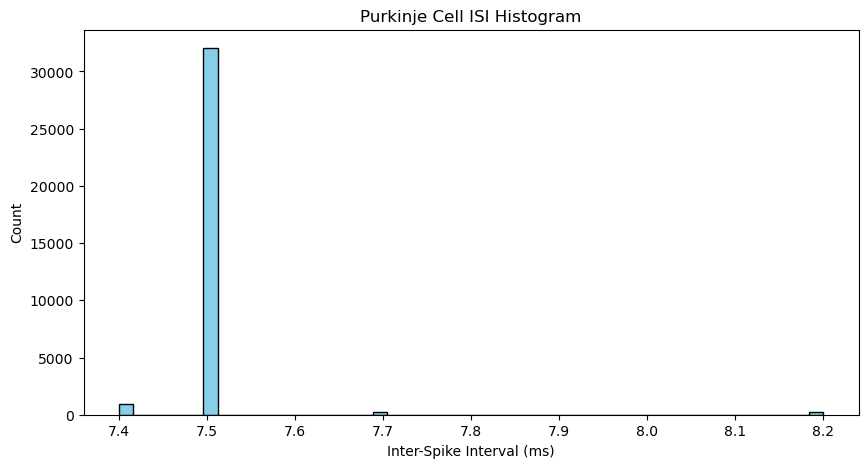

In [8]:
visualization.plot_raster(pc_spike_data, title="Purkinje Cell Raster Plot")
visualization.plot_isi_histogram(isis_distribution_pc, title="Purkinje Cell ISI Histogram")

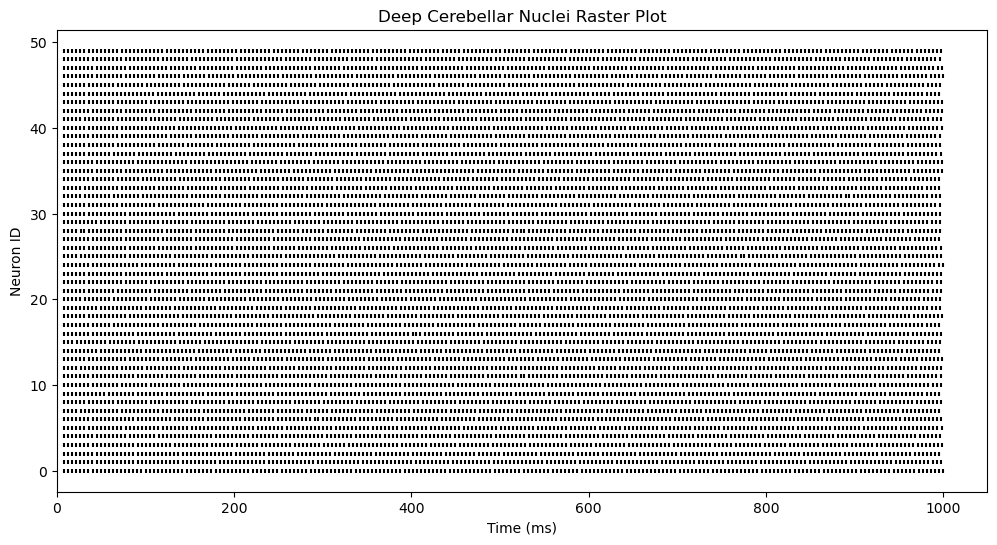

In [9]:
visualization.plot_raster(dcn_spike_data, title="Deep Cerebellar Nuclei Raster Plot")

Analyzing 255744 voltage samples over 998.0 ms
Analysis failed: Unable to convert between units of "dimensionless" and "s"


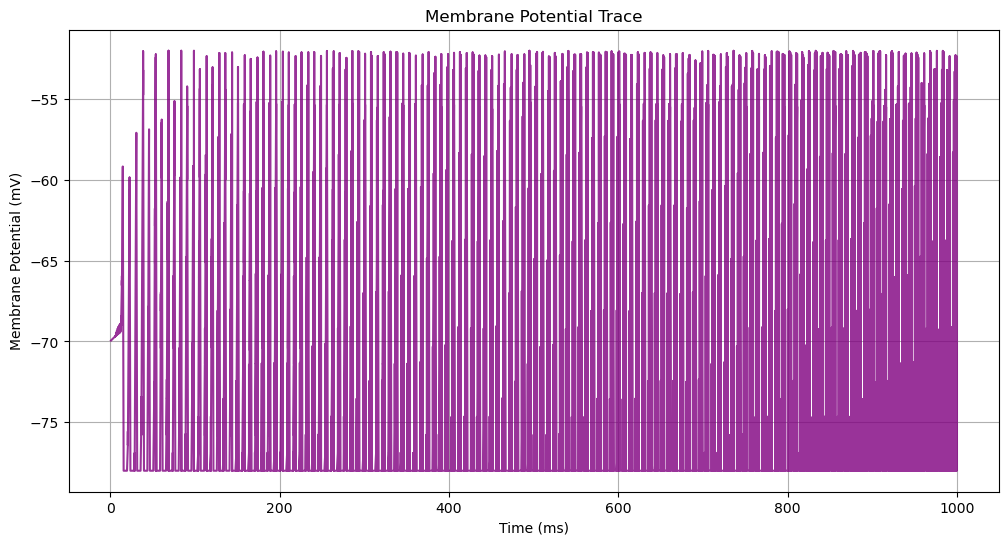

In [10]:
pc_voltages = results["purkinje_voltages"]

try:
    voltage_results = analysis.analyze_voltage_data(pc_voltages)
    visualization.plot_spectral_analysis(voltage_results)
except ValueError as e:
    print(f"Analysis failed: {str(e)}")
    visualization.plot_voltage_trace(pc_voltages)  # Show raw data for debugging

Number of mossy -> granule connections: 354910
Number of mossy -> golgi connections: 9417
Number of mossy -> DCN connections: 7610
Number of granule -> golgi connections: 4171
Number of granule -> purkinje connections: 542331
Number of granule -> interneuron connections: 518645
Number of golgi -> granule connections: 68470
Number of golgi -> golgi connections: 932
Number of climbing -> purkinje connections: 256
Number of interneuron -> purkinje connections: 1644
Number of interneuron -> interneuron connections: 28019
Number of purkinje -> DCN connections: 1280
Network setup complete.


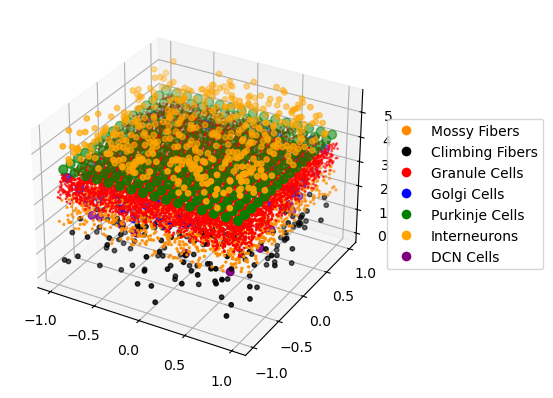

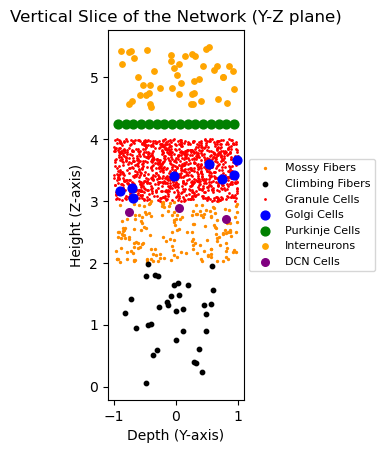


Feb 17 15:12:06 ConnectionManager [Warning]: 
    NewSimulation running...
 connections created, connection descriptors previously obtained using 
    'GetConnections' are now invalid.

Feb 17 15:12:06 NodeManager::prepare_nodes [Info]: 
    Preparing 13118 nodes for simulation.

Feb 17 15:12:06 SimulationManager::start_updating_ [Info]: 
    Number of local nodes: 13118
    Simulation time (ms): 1000
    Number of OpenMP threads: 1
    Not using MPI

Feb 17 15:13:14 SimulationManager::run [Info]: 
    Simulation finished.


In [ ]:
spatial_results = simulation.example_spatial_simulation()

The structure of the model was inspired by the following image which can be found in the "Cerebellar Modeling" lecture:
<SHOW THE IMAGE "Cerebellar Strucure.png">


In [ ]:
## Analyze spatial results

PC_spatial_spike_data = spatial_results["purkinje_spikes"]
PC_spatial_voltage_data = spatial_results["purkinje_voltages"]
GrC_spatial_spike_data = spatial_results["granule_spikes"]
GrC_spatial_voltage_data = spatial_results["granule_voltages"]
GoC_spatial_spike_data = spatial_results["golgi_spikes"]
GoC_spatial_voltage_data = spatial_results["golgi_voltages"]

PC_isis = analysis.get_isi_distribution(PC_spatial_spike_data["times"])
GrC_isis = analysis.get_isi_distribution(GrC_spatial_spike_data["times"])
GoC_isis = analysis.get_isi_distribution(GoC_spatial_spike_data["times"])

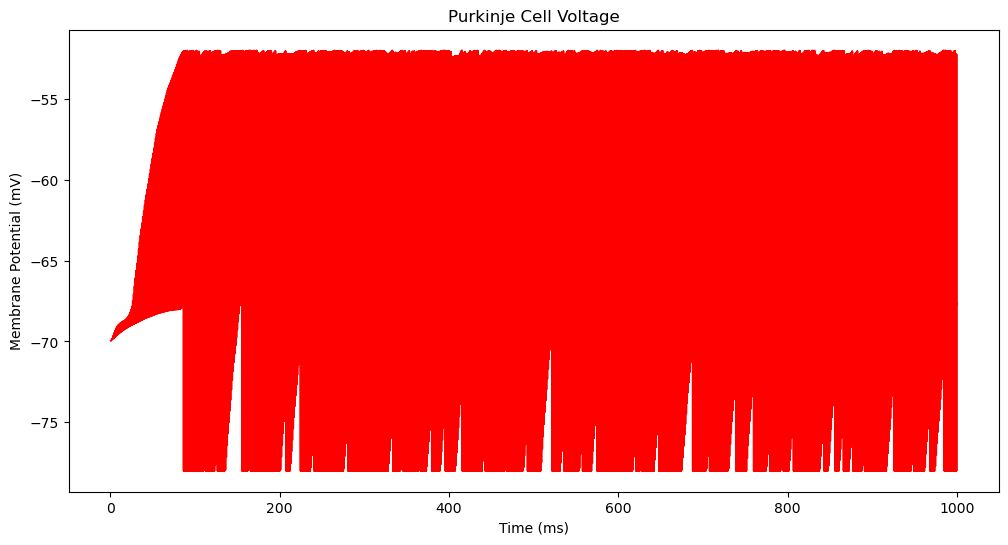

In [ ]:
visualization.plot_voltage_trace(PC_spatial_voltage_data, title="Purkinje Cell Voltage")

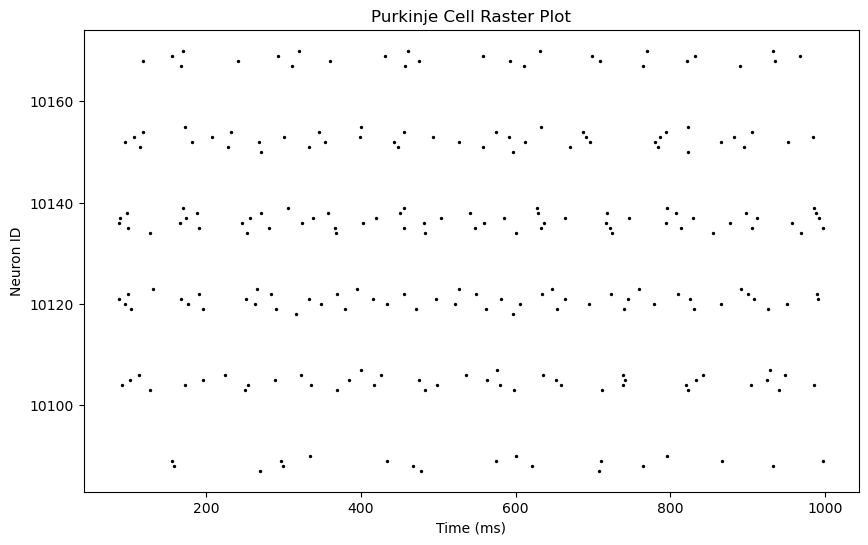

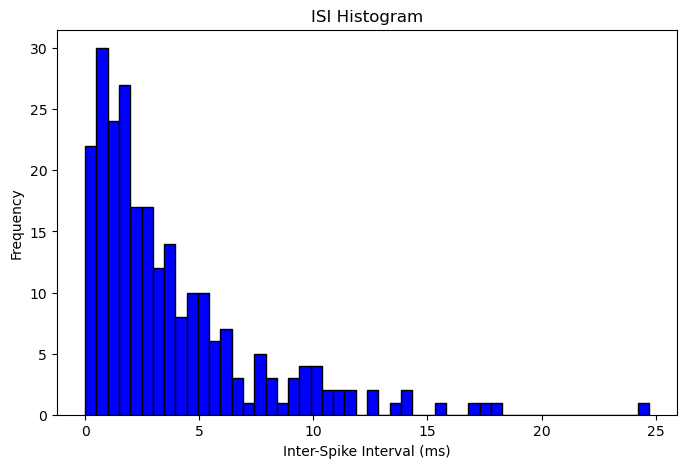

In [ ]:
visualization.plot_raster(PC_spatial_spike_data, title="Purkinje Cell Raster Plot")
visualization.plot_isi_histogram(PC_isis)

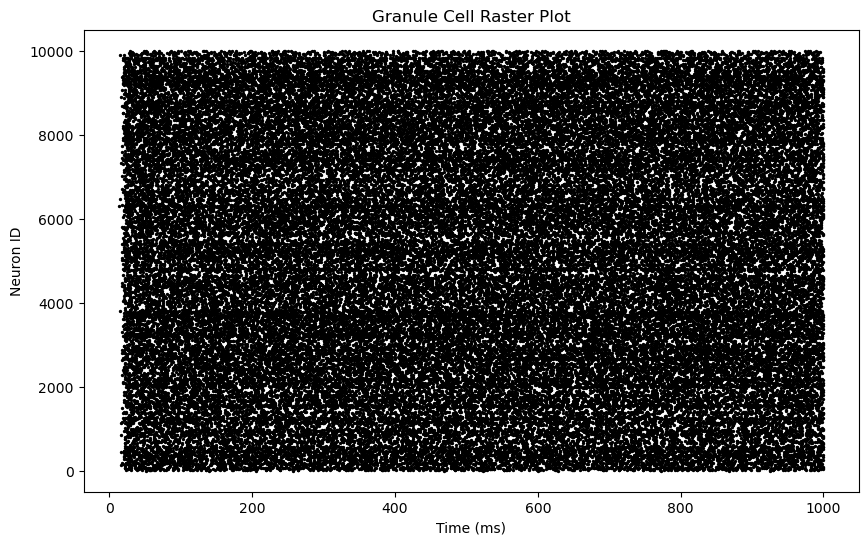

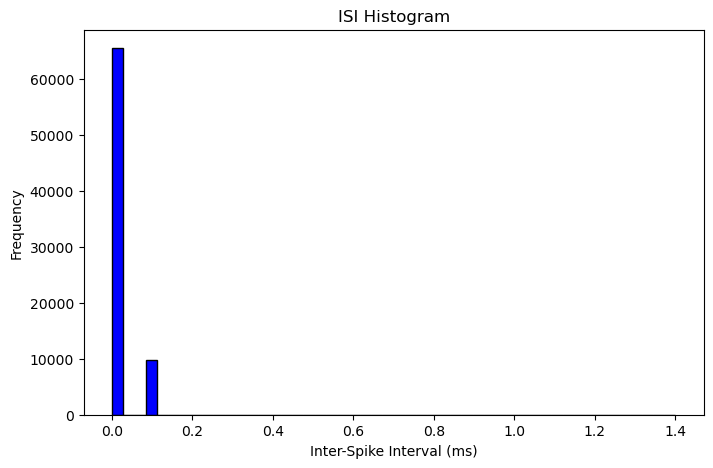

In [ ]:
visualization.plot_raster(GrC_spatial_spike_data, title="Granule Cell Raster Plot")
visualization.plot_isi_histogram(GrC_isis)

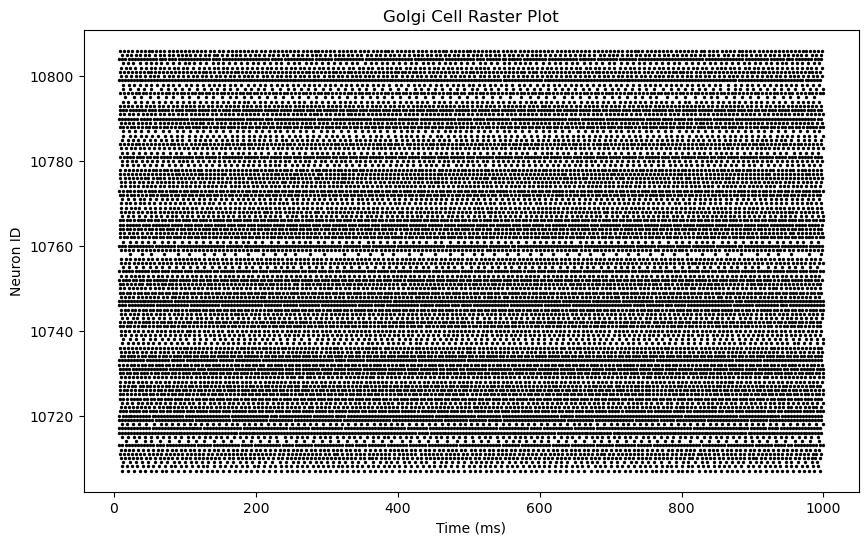

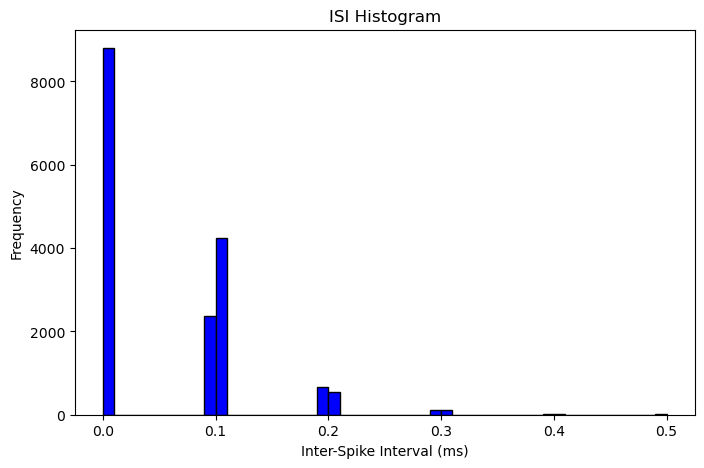

In [ ]:
visualization.plot_raster(GoC_spatial_spike_data, title="Golgi Cell Raster Plot")
visualization.plot_isi_histogram(GoC_isis)